In [128]:
import os
import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [129]:
# Destroy the current tensorflow graph and session and creates a new one

tf.keras.backend.clear_session()

In [130]:
spine_data = pd.read_csv("Dataset_spine.csv")

In [131]:
spine_data.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN


In [132]:
spine_data.iloc[:,-1:].head()

,Unnamed: 13
0,NaN
1,NaN
2,Prediction is done by using binary classificat...
3,NaN
4,NaN


In [133]:
# removing Unnecessary column
del spine_data["Unnamed: 13"]

In [134]:
spine_data.rename(columns = {
    "Col1" : "pelvic_incidence", 
    "Col2" : "pelvic_tilt",
    "Col3" : "lumbar_lordosis_angle",
    "Col4" : "sacral_slope", 
    "Col5" : "pelvic_radius",
    "Col6" : "degree_spondylolisthesis", 
    "Col7" : "pelvic_slope",
    "Col8" : "direct_tilt",
    "Col9" : "thoracic_slope", 
    "Col10" :"cervical_tilt", 
    "Col11" : "sacrum_angle",
    "Col12" : "scoliosis_slope", 
    "Class_att" : "class_att"}, inplace=True)

In [135]:
spine_data.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,class_att
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


In [136]:
spine_data.shape

(310, 13)

In [137]:
spine_data.head().T

,0,1,2,3,4
pelvic_incidence,63.0278,39.057,68.832,69.297,49.7129
pelvic_tilt,22.5526,10.061,22.2185,24.6529,9.65207
lumbar_lordosis_angle,39.6091,25.0154,50.0922,44.3112,28.3174
sacral_slope,40.4752,28.996,46.6135,44.6441,40.0608
pelvic_radius,98.6729,114.405,105.985,101.868,108.169
degree_spondylolisthesis,-0.2544,4.56426,-3.53032,11.2115,7.9185
pelvic_slope,0.744503,0.415186,0.474889,0.369345,0.54336
direct_tilt,12.5661,12.8874,26.8343,23.5603,35.494
thoracic_slope,14.5386,17.5323,17.4861,12.7074,15.9546
cervical_tilt,15.3047,16.7849,16.659,11.4245,8.87237


In [138]:
spine_data.columns

Index(['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis',
       'pelvic_slope', 'direct_tilt', 'thoracic_slope', 'cervical_tilt',
       'sacrum_angle', 'scoliosis_slope', 'class_att'],
      dtype='object')

In [139]:
spine_data['class_att'].unique()

array(['Abnormal', 'Normal'], dtype=object)

In [140]:
spine_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
pelvic_tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
lumbar_lordosis_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
sacral_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
pelvic_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
degree_spondylolisthesis,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082
pelvic_slope,310.0,0.472979,0.285787,0.003220,0.224367,0.475989,0.704846,0.998827
direct_tilt,310.0,21.321526,8.639423,7.027000,13.054400,21.907150,28.954075,36.743900
thoracic_slope,310.0,13.064511,3.399713,7.037800,10.417800,12.938450,15.889525,19.324000
cervical_tilt,310.0,11.933317,2.893265,7.030600,9.541140,11.953835,14.371810,16.821080


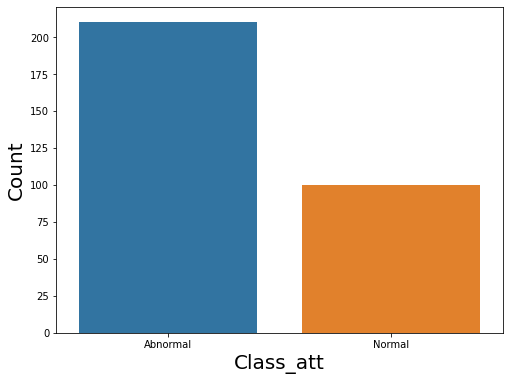

In [141]:
plt.figure(figsize = (8,6))

sns.countplot('class_att', data = spine_data)

plt.xlabel("Class_att", fontsize = 20)
plt.ylabel('Count', fontsize = 20)

plt.show()

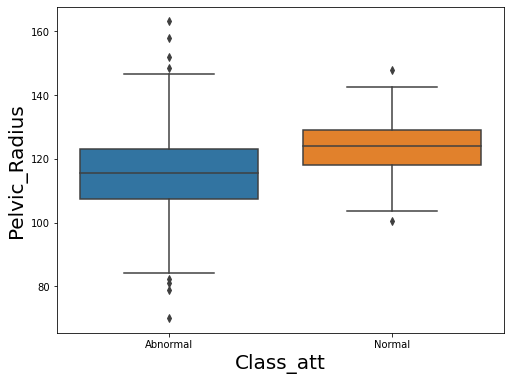

In [142]:
plt.figure(figsize = (8,6))

sns.boxplot('class_att', 'pelvic_radius', data = spine_data)

plt.xlabel("Class_att", fontsize = 20)
plt.ylabel('Pelvic_Radius', fontsize = 20)

plt.show()

In [143]:
class_att = {'Abnormal':0, 'Normal':1}

spine_data['class_att'].replace(class_att, inplace = True)

spine_data[['class_att']].sample(10)

,class_att
52,0
273,1
246,1
68,0
143,0
111,0
257,1
122,0
172,0
244,1


In [144]:
features = spine_data.drop('class_att', axis = 1)
target = spine_data[['class_att']]

In [145]:
sc = StandardScaler()

scaled_features = pd.DataFrame(sc.fit_transform(features), columns = features.columns, index = features.index)

scaled_features.describe().T

,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.0,-2.141656e-16,1.001617,-1.996010,-0.817398,-0.104925,0.719464,4.029206
pelvic_tilt,310.0,1.568638e-16,1.001617,-2.411664,-0.688114,-0.118606,0.458116,3.191402
lumbar_lordosis_angle,310.0,3.527644e-16,1.001617,-2.047652,-0.806027,-0.127862,0.597549,3.984615
sacral_slope,310.0,-1.719055e-16,1.001617,-2.207741,-0.716842,-0.040960,0.726941,5.855771
pelvic_radius,310.0,4.548333e-16,1.001617,-3.597963,-0.542383,0.026138,0.567621,3.395818
degree_spondylolisthesis,310.0,9.060852e-17,1.001617,-0.996172,-0.658507,-0.387450,0.399768,10.460350
pelvic_slope,310.0,1.074409e-17,1.001617,-1.646397,-0.871329,0.010547,0.812640,1.842974
direct_tilt,310.0,6.437503e-17,1.001617,-1.657245,-0.958454,0.067895,0.884884,1.788002
thoracic_slope,310.0,2.442491e-16,1.001617,-1.775578,-0.779769,-0.037140,0.832300,1.844158
cervical_tilt,310.0,-3.875036e-16,1.001617,-1.697267,-0.828145,0.007103,0.844180,1.692090


In [146]:
scaled_features.shape

(310, 12)

In [151]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(scaled_features, target, test_size = 0.15, random_state = 10)

In [152]:
x_train.shape, x_test.shape

((263, 12), (47, 12))

In [153]:
x_train,x_val,y_train,y_val = train_test_split(x_train, y_train, test_size = 0.15, random_state = 10)

In [154]:
x_train.shape, x_val.shape, x_test.shape

((223, 12), (40, 12), (47, 12))

In [155]:
y_train.shape, y_val.shape, y_test.shape

((223, 1), (40, 1), (47, 1))

**keras Funtional API(Application Programing Interface)**: The keras Functional API is a way to create models that are more flexible than Sequential models - models can have non_linear topology, shared layers, multiple inputs and outputs

In [156]:
def build_and_compile_model():
    
    inputs = tf.keras.Input(shape = (x_train.shape[1],))
    
    x = layers.Dense(16, activation = 'relu')(inputs)
    
    x = layers.Dropout(0.3)(x)
    
    x = layers.Dense(8, activation = 'relu')(x)
    
    predictions = layers.Dense(1, activation = 'sigmoid')(x)
    
    model = tf.keras.Model(inputs = inputs, outputs = predictions)
    
    model.summary()
    
    optimizer = tf.keras.optimizers.RMSprop(lr = 0.001)
    
    model.compile(optimizer = optimizer, loss = tf.keras.losses.BinaryCrossentropy(),
                 metrics = ['accuracy', tf.keras.metrics.Precision(0.5),
                           tf.keras.metrics.Recall(0.5),])
    
    return model

* Every layer instance is a callable, accepts inputs and returns a tensor

In [157]:
model = build_and_compile_model()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 12)]              0         
_________________________________________________________________
dense (Dense)                (None, 16)                208       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________


In [158]:
# keras.utils.plot_model(model,'model_classificatin_shapes.png',show_shapes = True)

In [159]:
dataset_train = tf.data.Dataset.from_tensor_slices((x_train.values, y_train.values))

dataset_train = dataset_train.batch(16)

dataset_train.shuffle(128)

<ShuffleDataset shapes: ((None, 12), (None, 1)), types: (tf.float64, tf.int64)>

**If your working with tensorflow using large scale datasets that's what you do in the real world you won't work with your data in the form of numpy arrays.**


**Instead you will use tf.data.Dataset converting your model to datasets allows you to train your model in a distributed manner using multiple devices. we will create our training dataset from_tensor_slices that we have x_train,y_train.** 


**we want our training data to be fed in batches of 16(it can vary) records to our model and we will shuffle our training data using a buffer of size 128(it can vary)**

In [160]:
num_epochs = 10

In [161]:
model.fit(dataset_train, epochs = num_epochs)

Epoch 1/10
14/14 [==============================] - 0s 3ms/step - loss: 0.6821 - accuracy: 0.5381 - precision: 0.3523 - recall: 0.4026
Epoch 2/10
14/14 [==============================] - 0s 2ms/step - loss: 0.6540 - accuracy: 0.6188 - precision: 0.4487 - recall: 0.4545
Epoch 3/10
14/14 [==============================] - 0s 3ms/step - loss: 0.6165 - accuracy: 0.6637 - precision: 0.5139 - recall: 0.4805
Epoch 4/10
14/14 [==============================] - 0s 3ms/step - loss: 0.6219 - accuracy: 0.6368 - precision: 0.4667 - recall: 0.3636
Epoch 5/10
14/14 [==============================] - 0s 3ms/step - loss: 0.5830 - accuracy: 0.6816 - precision: 0.5429 - recall: 0.4935
Epoch 6/10
14/14 [==============================] - 0s 3ms/step - loss: 0.5888 - accuracy: 0.6682 - precision: 0.5246 - recall: 0.4156
Epoch 7/10
14/14 [==============================] - 0s 3ms/step - loss: 0.5702 - accuracy: 0.6816 - precision: 0.5500 - recall: 0.4286
Epoch 8/10
14/14 [==============================] - 0s 

In [162]:
dataset_val = tf.data.Dataset.from_tensor_slices((x_val.values, y_val.values))

dataset_val = dataset_val.batch(16)



In [163]:
model = build_and_compile_model()

training_history = model.fit(dataset_train, epochs = num_epochs, validation_data = dataset_val)

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 12)]              0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                208       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
14/14 [==============================] - 1s 58ms/step - loss: 0.8594 - accuracy: 0.3857 - precision_1: 0.3485 -

In [164]:
training_history.history.keys()

dict_keys(['loss', 'accuracy', 'precision_1', 'recall_1', 'val_loss', 'val_accuracy', 'val_precision_1', 'val_recall_1'])

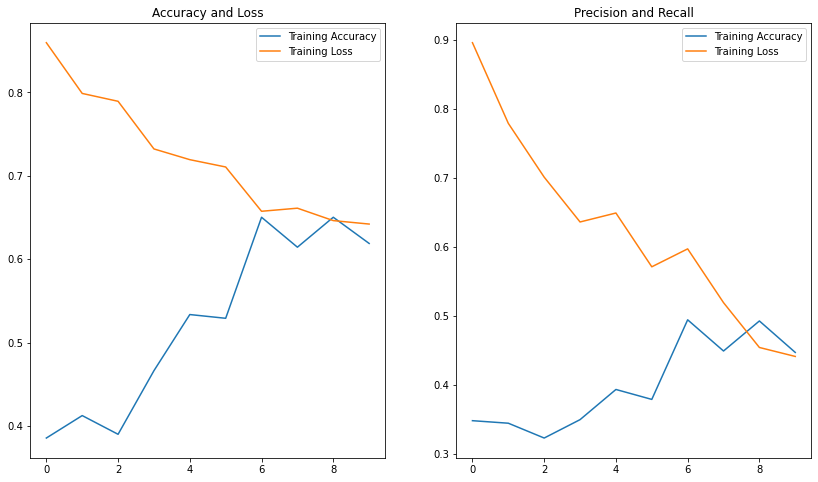

In [165]:
train_acc = training_history.history['accuracy']
train_loss = training_history.history['loss']

precision = training_history.history['precision_1']
recall = training_history.history['recall_1']

epochs_range = range(num_epochs)

plt.figure(figsize = (14,8))

plt.subplot(1,2,1)

plt.plot(epochs_range, train_acc, label = 'Training Accuracy')
plt.plot(epochs_range, train_loss, label = 'Training Loss')

plt.title('Accuracy and Loss')
plt.legend()

plt.subplot(1,2,2)

plt.plot(epochs_range, precision, label = 'Training Accuracy')
plt.plot(epochs_range, recall,    label = 'Training Loss')

plt.title('Precision and Recall')
plt.legend()
plt.show()

In [166]:
y_pred = model.predict(x_test)

y_pred[:10]

array([[0.49450436],
       [0.473082  ],
       [0.3575297 ],
       [0.67815506],
       [0.51698095],
       [0.4588448 ],
       [0.46109888],
       [0.38797003],
       [0.5421597 ],
       [0.46321738]], dtype=float32)

In [168]:
y_pred = np.where(y_pred>=0.5, 1, y_pred)
y_pred = np.where(y_pred<0.5, 0, y_pred)

In [169]:
y_pred[:10]

array([[0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.]], dtype=float32)

In [170]:
pred_results = pd.DataFrame({'y_test':y_test.values.flatten(),
                            'y_pred':y_pred.flatten().astype('int32')},
                           index = range(len(y_pred)))

In [171]:
pd.crosstab(pred_results.y_pred,pred_results.y_test)

y_test,0,1
y_pred,,
0,30,6
1,4,7


In [172]:
accuracy_score(y_test,y_pred)

0.7872340425531915

In [173]:
precision_score(y_test,y_pred)

0.6363636363636364

* The number of positive predictions by our model that were correct

In [174]:
recall_score(y_test,y_pred)

0.5384615384615384

* The number of postive values in the dataset that were correctly identify by our model

In [177]:
ckpt_path = 'C:/Users/G ANIL/Neural Networks/Neural Networks Janani Ravi/Part II/Untitled Folder'
ckpt_dir = os.path.dirname(ckpt_path)


ckpt_callback = tf.keras.callbacks.ModelCheckpoint(filepath = ckpt_path,
                                                  save_weights_only = True,
                                                  save_freq = 3,
                                                  verbose = False)

In [178]:
model = build_and_compile_model()

model.fit(dataset_train,epochs = num_epochs, validation_data = dataset_val,
         verbose = False, callbacks = [ckpt_callback])

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 12)]              0         
_________________________________________________________________
dense_9 (Dense)              (None, 16)                208       
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 9         
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________


In [179]:
y_pred = model.predict(x_test)

y_pred = np.where(y_pred>=0.5, 1, y_pred)
y_pred = np.where(y_pred<0.5, 0, y_pred)

accuracy_score(y_test,y_pred)

0.7021276595744681

In [180]:
reloaded_model = build_and_compile_model()

reloaded_model.load_weights(ckpt_path)

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 12)]              0         
_________________________________________________________________
dense_12 (Dense)             (None, 16)                208       
_________________________________________________________________
dropout_4 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 9         
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________


In [185]:
y_pred = reloaded_model.predict(x_test)

y_pred = np.where(y_pred>=0.5, 1, y_pred)
y_pred = np.where(y_pred<0.5, 0, y_pred)

accuracy_score(y_test,y_pred)

0.723404255319149

In [186]:
reloaded_model.fit(dataset_train, epochs = 5, validation_data = dataset_val)

Epoch 1/5
14/14 [==============================] - 0s 2ms/step - loss: 0.4963 - accuracy: 0.7085 - precision_4: 0.6364 - recall_4: 0.3636 - val_loss: 0.4182 - val_accuracy: 0.8000 - val_precision_4: 0.6250 - val_recall_4: 0.5000
Epoch 2/5
14/14 [==============================] - 0s 5ms/step - loss: 0.5050 - accuracy: 0.7130 - precision_4: 0.6970 - recall_4: 0.2987 - val_loss: 0.4158 - val_accuracy: 0.8000 - val_precision_4: 0.6250 - val_recall_4: 0.5000
Epoch 3/5
14/14 [==============================] - 0s 4ms/step - loss: 0.4788 - accuracy: 0.7175 - precision_4: 0.7059 - recall_4: 0.3117 - val_loss: 0.4116 - val_accuracy: 0.8000 - val_precision_4: 0.6250 - val_recall_4: 0.5000
Epoch 4/5
14/14 [==============================] - 0s 7ms/step - loss: 0.5062 - accuracy: 0.7265 - precision_4: 0.6739 - recall_4: 0.4026 - val_loss: 0.4103 - val_accuracy: 0.8000 - val_precision_4: 0.6250 - val_recall_4: 0.5000
Epoch 5/5
14/14 [==============================] - 0s 6ms/step - loss: 0.4828 - accu

In [187]:
y_pred = reloaded_model.predict(x_test)

y_pred = np.where(y_pred>=0.5, 1, y_pred)
y_pred = np.where(y_pred<0.5, 0, y_pred)

accuracy_score(y_test,y_pred)

0.7659574468085106

In [188]:
model = build_and_compile_model()

Model: "functional_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 12)]              0         
_________________________________________________________________
dense_15 (Dense)             (None, 16)                208       
_________________________________________________________________
dropout_5 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 9         
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________


In [189]:
log_dir = "logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir, histogram_freq = 1)

In [190]:
model.fit(dataset_train, epochs = num_epochs, validation_data = dataset_val, verbose = False,
         callbacks = [tensorboard_callback])

Instructions for updating:
use `tf.profiler.experimental.stop` instead.


In [191]:
%load_ext tensorboard

In [193]:
%tensorboard --logdir logs/

Reusing TensorBoard on port 6006 (pid 6300), started 0:02:14 ago. (Use '!kill 6300' to kill it.)